## Convolutional Neural Networks

## Project: Plant Seedlings Classification

---


This project is intended to classify the plant seedlings based on the image data for which we have trained model on the set of image data available from Kaggle competitions. Since our training data are images of the different classes of the plants, we have decided to use the convolutional neural networks.



You are provided with a training set and a test set of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the competition is to create a classifier capable of determining a plant's species from a photo. The list of species is as follows:


1.   Black-grass
2.   Charlock
3.   Cleavers
4.   Common Chickweed
5.   Common wheat
6.   Fat Hen
7.   Loose Silky-bent
8.   Maize
9.   Scentless Mayweed
10.   Shepherds Purse
11.   Small-flowered Cranesbill
12.   Sugar beet













### The Road Ahead

We break the notebook into separate steps. 

*  Import Datasets
*  Create a CNN to Classify Plant species from Scratch

---
##  Importing Datasets

### Import Plant Species Dataset from Kaggle

In the code cell below, we import a dataset of plant species images to the colab using kaggle API.

In [2]:
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karthikkumarg","key":"394571733cab4a134cc2cad145b903aa"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Jan 14 15:46 kaggle.json


In [0]:
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ 


# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c plant-seedlings-classification

  0% 0.00/5.13k [00:00<?, ?B/s]
100% 5.13k/5.13k [00:00<00:00, 4.28MB/s]
 99% 85.0M/86.0M [00:00<00:00, 69.4MB/s]
100% 86.0M/86.0M [00:00<00:00, 98.4MB/s]
100% 1.60G/1.60G [00:22<00:00, 121MB/s]
100% 1.60G/1.60G [00:22<00:00, 74.9MB/s]


In [7]:
!ls

kaggle.json  sample_data  sample_submission.csv.zip  test.zip  train.zip


In [8]:
!unzip sample_submission.csv.zip
!unzip test.zip
!unzip train.zip


Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  test.zip
   creating: test/
  inflating: test/c0461776c.png      
  inflating: test/4bbfd1e05.png      
  inflating: test/1d0cbd819.png      
  inflating: test/93079d970.png      
  inflating: test/856f2910a.png      
  inflating: test/976e4e079.png      
  inflating: test/b31292706.png      
  inflating: test/29bab7cad.png      
  inflating: test/37297a64c.png      
  inflating: test/f2dc546ca.png      
  inflating: test/b6a3f7876.png      
  inflating: test/8874bba69.png      
  inflating: test/1459e96a0.png      
  inflating: test/9a3f20121.png      
  inflating: test/5315c2dca.png      
  inflating: test/b7a7f6390.png      
  inflating: test/20e562fd5.png      
  inflating: test/e3f50adfc.png      
  inflating: test/6ba4ef411.png      
  inflating: test/acdb75e00.png      
  inflating: test/e0ec5b6a1.png      
  inflating: test/219fd68d5.png      
  inflating: test/41f1c3cdb.png      
  inflating: t

### Plant Seedlings  Classification Dataset Characterstics

We populate a few variables of  dataset :
- `train_files`  - number of images in training dataset.
-  Number of species in plant seedlings.

In [9]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    plant_files = np.array(data['filenames'])
    plant_targets = np_utils.to_categorical(np.array(data['target']), 12)
    return plant_files, plant_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('train')

Using TensorFlow backend.


In [0]:
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob

images_per_species = {}
for species in os.listdir('train'):
    species_folder_path = os.path.join('train', species)
    species_label = species
    images_per_species[species_label] = []
    for image_path in glob(os.path.join(species_folder_path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        images_per_species[species_label].append(image)

In [11]:
image_files =0
histogram={}
for key,value in images_per_species.items():
    print(key+': '+str(len(value)))
    image_files+=len(value)
    histogram[key[:2]]=len(value)
print('\nThere are %d total plant species.' % len(images_per_species))
print('There are %d training plant images.' % image_files)

Common Chickweed: 611
Small-flowered Cranesbill: 496
Fat Hen: 475
Charlock: 390
Scentless Mayweed: 516
Maize: 221
Cleavers: 287
Sugar beet: 385
Loose Silky-bent: 654
Common wheat: 221
Black-grass: 263
Shepherds Purse: 231

There are 12 total plant species.
There are 4750 training plant images.


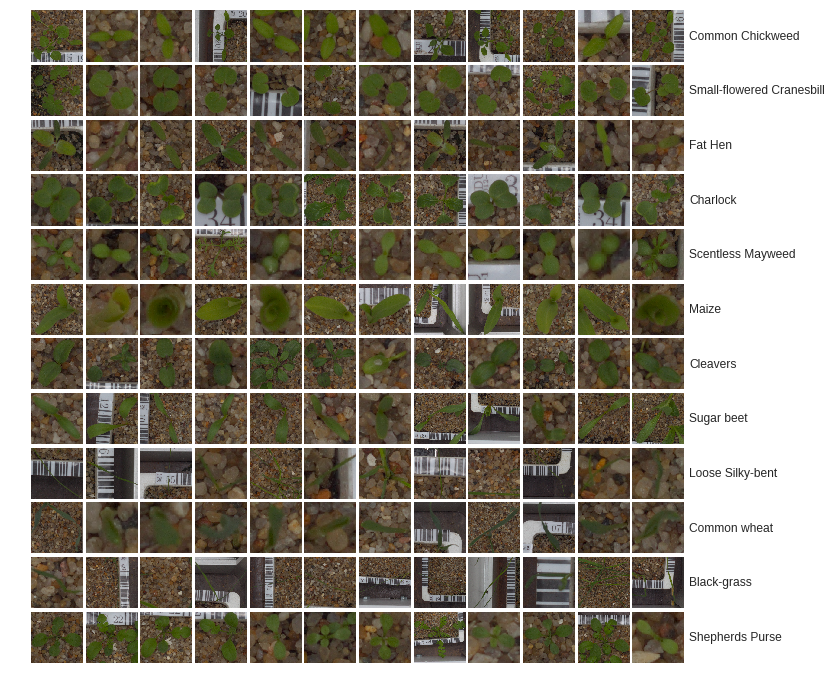

In [12]:
from keras.preprocessing import image
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd

train = []
for category_id, category in enumerate(images_per_species):
    for file in os.listdir(os.path.join('train', category)):
        train.append(['train/{}/{}'.format(category, file), category_id, category])
train = pd.DataFrame(train, columns=['file', 'category_id', 'category'])
train.head(2)
train.shape
NUM_CATEGORIES = 12
fig = plt.figure(1, figsize=(NUM_CATEGORIES, NUM_CATEGORIES))
grid = ImageGrid(fig, 111, nrows_ncols=(NUM_CATEGORIES, NUM_CATEGORIES), axes_pad=0.05)
i = 0
for category_id, category in enumerate(images_per_species):
    for filepath in train[train['category'] == category]['file'].values[:NUM_CATEGORIES]:
        ax = grid[i]
        img = image.load_img(filepath, target_size=(224,224))
        ax.imshow(img)
        ax.axis('off')
        if i % NUM_CATEGORIES == NUM_CATEGORIES - 1:
            ax.text(250, 112, filepath.split('/')[1], verticalalignment='center')
        i += 1
plt.show();


<Container object of 11 artists>

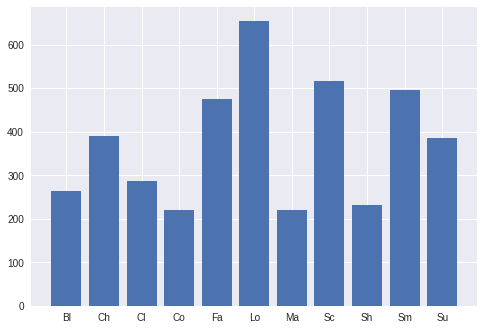

In [13]:


names = list(histogram.keys())
values = list(histogram.values())


plt.bar(names, values)

### Splitting the Downloaded Data to Train and Test Datasets

Splitting the downloaded data to train and test data using train_test_split function from sklearn.model_selection.



In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_files, train_targets, test_size=0.3)

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 51, 51, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [0]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(51, 51))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [16]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(X_train).astype('float32')
test_tensors = paths_to_tensor(X_test).astype('float32')

100%|██████████| 1425/1425 [00:17<00:00, 79.70it/s]



## Creating a CNN to Classify Plant Species from Scratch



### (IMPLEMENTATION) Model Architecture

Creating a CNN to classify plant species.  The following code cell block summarize the layers of your model by executing the line:
    
        model.summary()


In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, GlobalAveragePooling2D, Dense

model = Sequential()
model.add(Conv2D(filters = 128, kernel_size= 3,strides =2,activation='relu', input_shape=(51,51,3)))
model.add(Conv2D(filters = 256, kernel_size= 3,strides =2,activation='relu'))
model.add(Conv2D(filters = 256, kernel_size= 3,strides =2,activation='relu'))
model.add(Conv2D(filters = 512, kernel_size= 3,strides =2,activation='relu'))

model.add(GlobalAveragePooling2D())
model.add(Dense(200,activation='relu'))
model.add(Dense(12,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 25, 25, 128)       3584      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 5, 256)         590080    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 2, 2, 512)         1180160   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               102600    
_________________________________________________________________
dense_6 (Dense)              (None, 12)                2412      
Total para

### Compile the Model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Training the Model

Training model in the code cell below.  Using model checkpointing to save the model that attains the best validation loss.

In [30]:
from keras.callbacks import ModelCheckpoint 

checkpointer = ModelCheckpoint(filepath='weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

history = model.fit(train_tensors, y_train, 
          validation_split= 0.2,
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1, shuffle = True)


Train on 2660 samples, validate on 665 samples
Epoch 1/20
2660/2660 [==============================] - 3s 1ms/step - loss: 14.3072 - acc: 0.1094 - val_loss: 14.4942 - val_acc: 0.1008

Epoch 00001: val_loss improved from inf to 14.49417, saving model to weights.best.from_scratch.hdf5
Epoch 2/20
2660/2660 [==============================] - 2s 921us/step - loss: 14.3366 - acc: 0.1105 - val_loss: 14.4942 - val_acc: 0.1008

Epoch 00002: val_loss did not improve from 14.49417
Epoch 3/20
2660/2660 [==============================] - 2s 924us/step - loss: 14.3366 - acc: 0.1105 - val_loss: 14.4942 - val_acc: 0.1008

Epoch 00003: val_loss did not improve from 14.49417
Epoch 4/20
2660/2660 [==============================] - 2s 929us/step - loss: 14.3366 - acc: 0.1105 - val_loss: 14.4942 - val_acc: 0.1008

Epoch 00004: val_loss did not improve from 14.49417
Epoch 5/20
2660/2660 [==============================] - 2s 919us/step - loss: 14.3366 - acc: 0.1105 - val_loss: 14.4942 - val_acc: 0.1008

Epoc

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


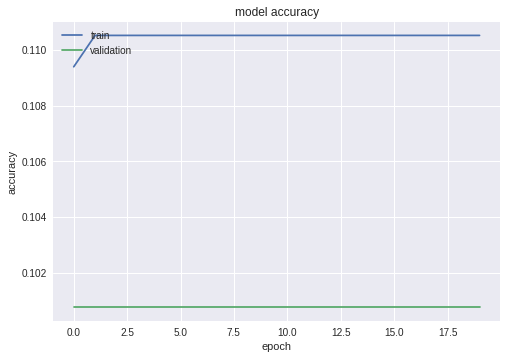

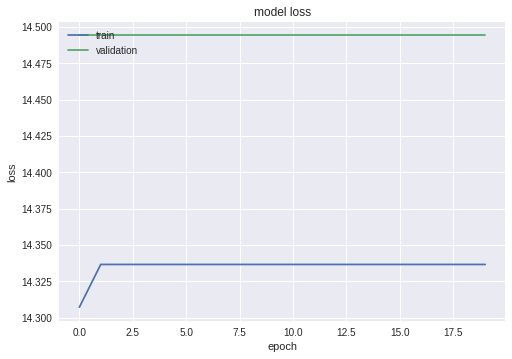

In [31]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
model.load_weights('weights.best.from_scratch.hdf5')

### Test the Model

Testing model on the test dataset of plant species images.

In [33]:
# get index of predicted plant species for each image in test set
model_predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) for feature in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(model_predictions)==np.argmax(y_test, axis=1))/len(model_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 10.8772%


### Normalising the data

In [36]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(X_train).astype('float32')/255
test_tensors = paths_to_tensor(X_test).astype('float32')/255

100%|██████████| 1425/1425 [00:17<00:00, 83.57it/s]


In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, GlobalAveragePooling2D, Dense

model2 = Sequential()
model2.add(Conv2D(filters = 128, kernel_size= 3,strides =2,activation='relu', input_shape=(51,51,3)))
model2.add(Conv2D(filters = 256, kernel_size= 3,strides =2,activation='relu'))
model2.add(Conv2D(filters = 256, kernel_size= 3,strides =2,activation='relu'))
model2.add(Conv2D(filters = 512, kernel_size= 3,strides =2,activation='relu'))

model2.add(GlobalAveragePooling2D())
model2.add(Dense(200,activation='relu'))
model2.add(Dense(12,activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 25, 25, 128)       3584      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 5, 5, 256)         590080    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 2, 2, 512)         1180160   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               102600    
_________________________________________________________________
dense_8 (Dense)              (None, 12)                2412      
Total para

### Compile the Model

In [0]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Training the Model on Normalised Data

Training model in the code cell below.  Using model checkpointing to save the model that attains the best validation loss.

In [39]:
from keras.callbacks import ModelCheckpoint 

checkpointer = ModelCheckpoint(filepath='weights.best.from_scratch1.hdf5', 
                               verbose=1, save_best_only=True)

history = model2.fit(train_tensors, y_train, 
          validation_split= 0.2,
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1, shuffle = True)


Train on 2660 samples, validate on 665 samples
Epoch 1/20
2660/2660 [==============================] - 3s 1ms/step - loss: 2.4342 - acc: 0.1605 - val_loss: 2.3532 - val_acc: 0.2000

Epoch 00001: val_loss improved from inf to 2.35323, saving model to weights.best.from_scratch1.hdf5
Epoch 2/20
2660/2660 [==============================] - 2s 919us/step - loss: 2.0739 - acc: 0.2695 - val_loss: 2.0108 - val_acc: 0.2692

Epoch 00002: val_loss improved from 2.35323 to 2.01077, saving model to weights.best.from_scratch1.hdf5
Epoch 3/20
2660/2660 [==============================] - 2s 924us/step - loss: 1.7735 - acc: 0.3692 - val_loss: 1.5043 - val_acc: 0.4541

Epoch 00003: val_loss improved from 2.01077 to 1.50432, saving model to weights.best.from_scratch1.hdf5
Epoch 4/20
2660/2660 [==============================] - 2s 929us/step - loss: 1.5515 - acc: 0.4647 - val_loss: 1.3630 - val_acc: 0.5023

Epoch 00004: val_loss improved from 1.50432 to 1.36299, saving model to weights.best.from_scratch1.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


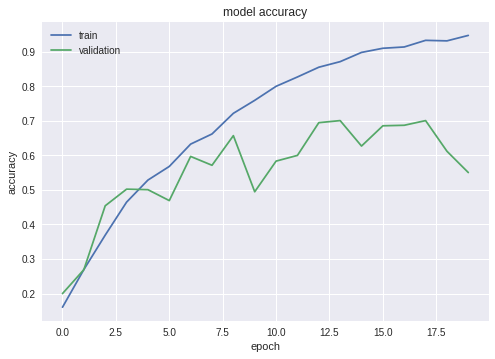

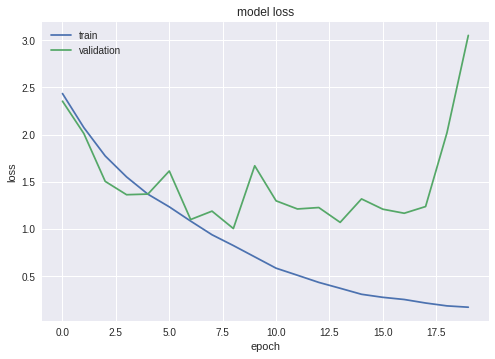

In [40]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
model.load_weights('weights.best.from_scratch1.hdf5')

### Test the Model

Testing model on the test dataset of plant species images.

In [42]:
# get index of predicted plant species for each image in test set
model_2_predictions = [np.argmax(model2.predict(np.expand_dims(feature, axis=0))) for feature in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(model_2_predictions)==np.argmax(y_test, axis=1))/len(model_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 55.5789%
